In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
%matplotlib inline

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.shape

(4177, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
label=le.fit_transform(data["Sex"])
label

array([2, 2, 0, ..., 2, 0, 2])

In [11]:
le.classes_

array(['F', 'I', 'M'], dtype=object)

In [12]:
data=data.drop("Sex",axis='columns')

In [13]:
data.head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [14]:
data["Sex"]=label

In [15]:
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,0


In [16]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,1.052909
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.822240
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,1.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,2.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,2.000000


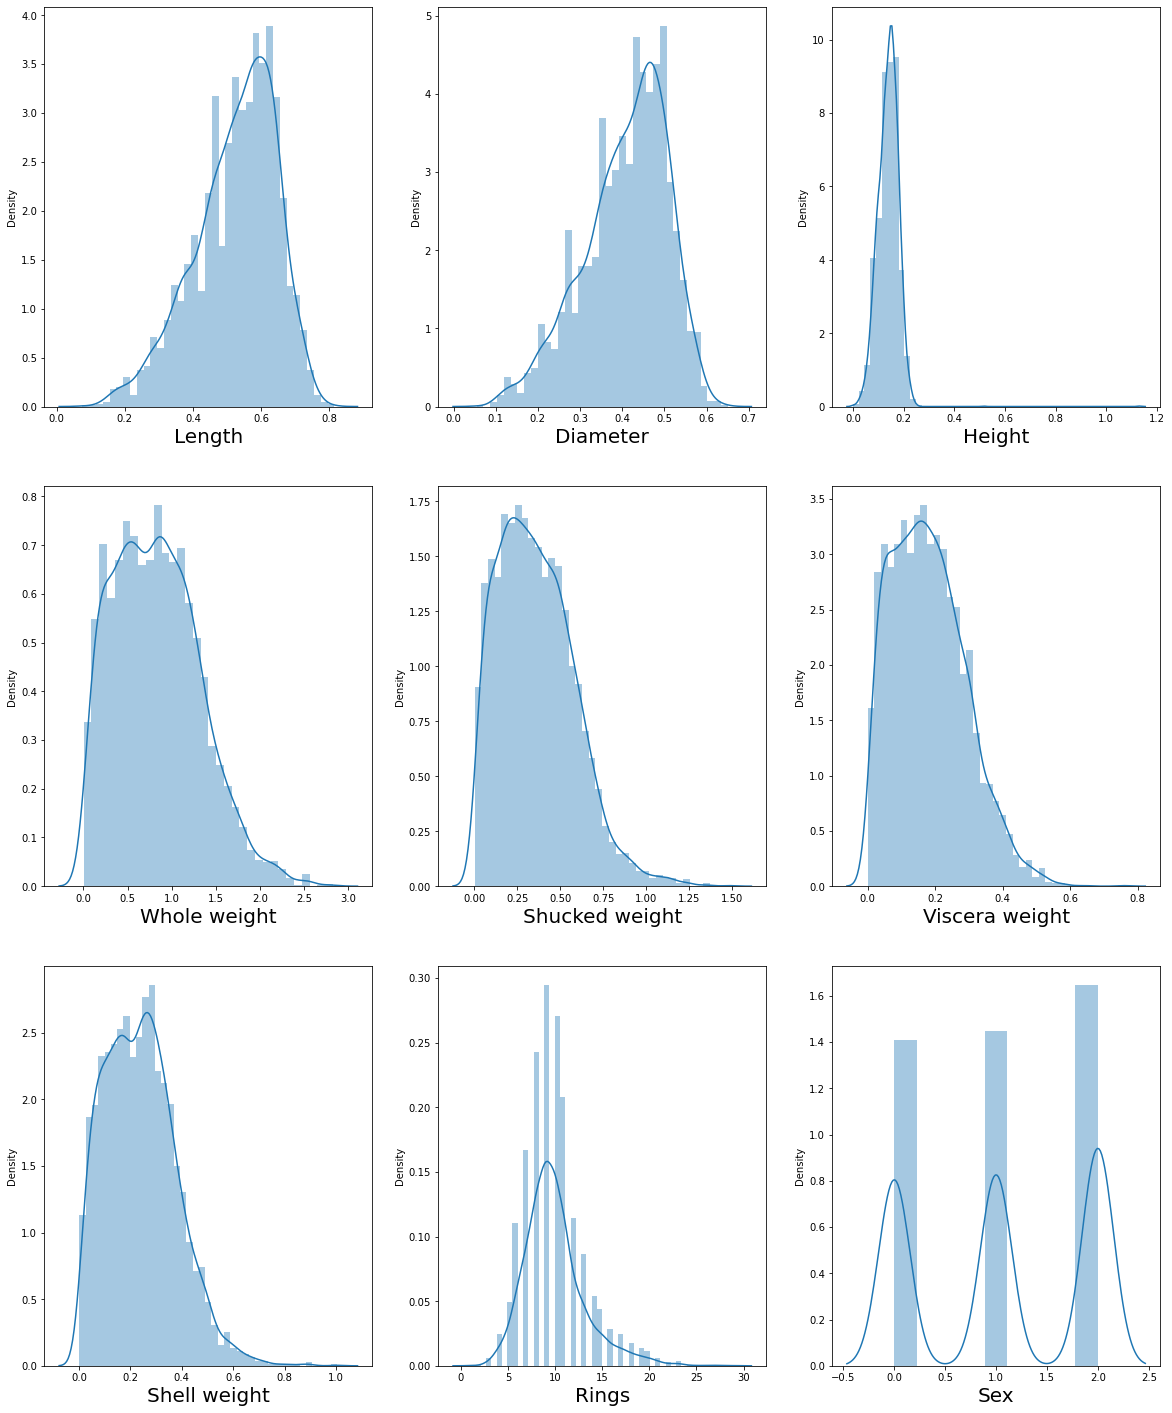

In [17]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [18]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex'],
      dtype='object')

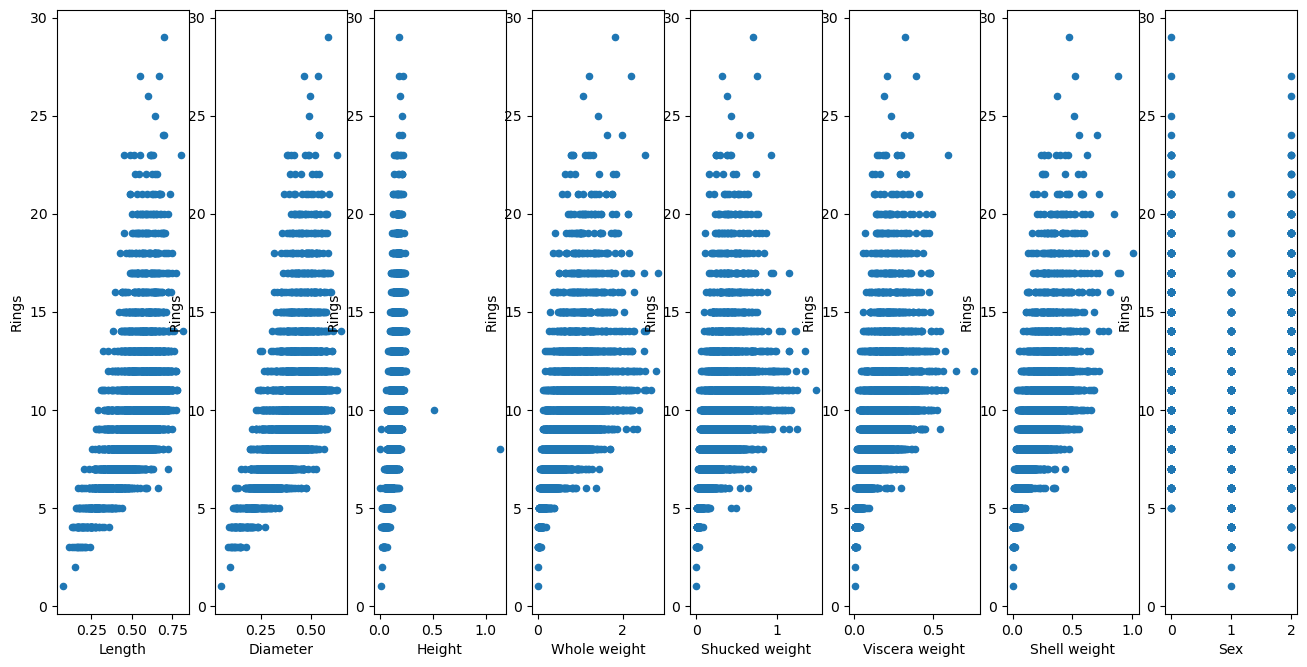

In [30]:
fig,axs=plt.subplots(1,8,figsize=(16,8),dpi=100)
data.plot(kind='scatter',x='Length',y='Rings',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='Diameter',y='Rings',ax=axs[1],figsize=(16,8))
data.plot(kind='scatter',x='Height',y='Rings',ax=axs[2],figsize=(16,8))
data.plot(kind='scatter',x='Whole weight',y='Rings',ax=axs[3],figsize=(16,8))
data.plot(kind='scatter',x='Shucked weight',y='Rings',ax=axs[4],figsize=(16,8))
data.plot(kind='scatter',x='Viscera weight',y='Rings',ax=axs[5],figsize=(16,8))
data.plot(kind='scatter',x='Shell weight',y='Rings',ax=axs[6],figsize=(16,8))
data.plot(kind='scatter',x='Sex',y='Rings',ax=axs[7],figsize=(16,8))
fig.savefig('testdata1.jpg')

In [32]:
#identifying outliers
df_features=data.drop('Rings',axis=1)

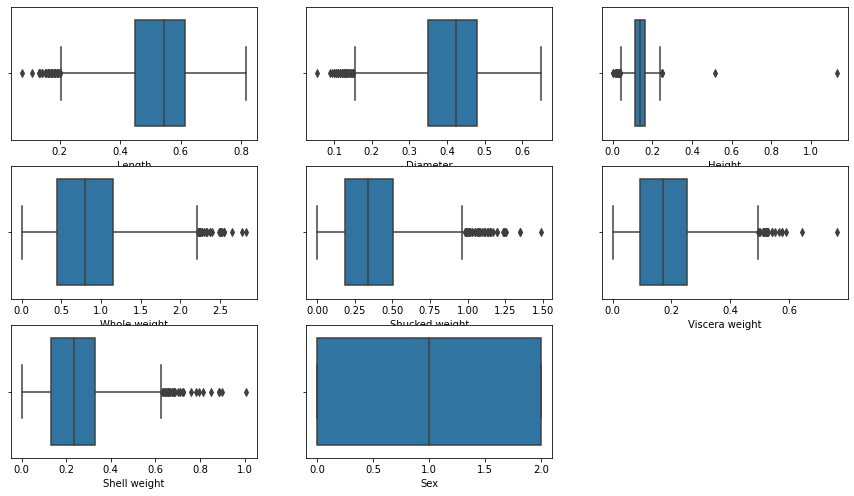

In [33]:
#visualize the outliers using boxplot
plt.figure(figsize=(15,20))
graph=1
for column in df_features:
    if graph<30:
        ax=plt.subplot(7,3,graph)
        sns.boxplot(df_features[column],orient='V')
        plt.xlabel(column,fontsize=10)
        graph+=1
plt.show()        

In [34]:
#find the IQR to identify outliers
#1st quantile
q1=data.quantile(0.25)
#3rd quantile
q3=data.quantile(0.75)
#IQR
iqr=q3-q1
print(iqr)

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
Sex               2.0000
dtype: float64


In [35]:
print(data < (q1 - 1.5 * iqr))

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      False     False   False         False           False           False   
1      False     False   False         False           False           False   
2      False     False   False         False           False           False   
3      False     False   False         False           False           False   
4      False     False   False         False           False           False   
...      ...       ...     ...           ...             ...             ...   
4172   False     False   False         False           False           False   
4173   False     False   False         False           False           False   
4174   False     False   False         False           False           False   
4175   False     False   False         False           False           False   
4176   False     False   False         False           False           False   

      Shell weight  Rings    Sex  
0   

In [36]:
#devide data set into feature and label
y=data['Rings']
x=data.drop(['Rings'],axis=1)

In [37]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [38]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,1
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,0


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.15198011],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732,  1.15198011],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -1.28068972],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471,  1.15198011],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914, -1.28068972],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  1.15198011]])

# model building

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=323)

In [42]:
y_train.head()

693      9
4102    11
494     17
3697    12
1386    12
Name: Rings, dtype: int64

In [43]:
#model instantiating and training
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [44]:
#predict the Rings of given feature
data.tail(2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10,0
4176,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12,2


In [45]:
print('Rings is:',regression.predict(scalar.transform([[0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,2]])))

Rings is: [10.98720604]


In [ ]:
#saving for further prediction

In [48]:
#saving model to the local file system
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))
#prediction using the saved model
Loaded_model=pickle.load(open(filename,'rb'))
a=Loaded_model.predict(scalar.transform([[0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,2]]))
a

array([10.98720604])

In [49]:
#Adjusted R2 score
regression.score(x_train,y_train)

0.532464880513476

In [50]:
#check how well model fits the test data
regression.score(x_test,y_test)

0.47443062886611054

In [51]:
#lets plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([12.13815284, 13.657096  ,  7.78176506, ..., 20.43327024,
        9.19986519, 13.32249418])

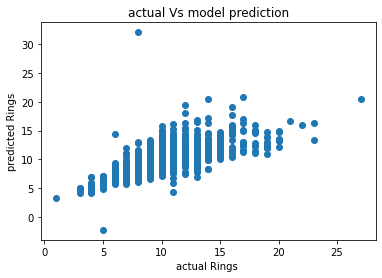

In [52]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual Rings ')
plt.ylabel('predicted Rings')
plt.title('actual Vs model prediction')
plt.show()